In [171]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [172]:
column_names = [
"address",
"price",
"gross_tax",
"strata_maintenance_fees",
"bedrooms",
"bathrooms",
"property_type",
"property_age",
"title",
"style",
"heating_type",
"feature",
"amenities",
"appliances",
"community",
"days_on_rew",
"property_views",
"mls®_number",
"source",
'frontage', 
'lot_size', 
'year_built', 
'depth',
'half_bathrooms'
]



# Get average housing price per city

In [173]:

def get_df(file_path, apply_columns=True):

    sys.path.append(file_path)

    data = pd.read_csv(file_path, on_bad_lines='skip')

    # data.dropna(inplace=True)
    if apply_columns:
        data.columns = column_names
    return data



folder = "../data/raw_2023_04_19/"

filenames = {
    "burnaby": "burnaby_real_estate_data.csv",
    "langley":"langley_real_estate_data.csv",
    "richmond":"richmond_real_estate_data.csv",
    "maple_ridge":"maple-ridge_real_estate_data.csv",
    "surrey":"surrey_real_estate_data.csv",
    "new_west": "new-westminster_real_estate_data.csv",
    "vancouver":"vancouver_real_estate_data.csv",
    "coquitlam":"coquitlam_real_estate_data.csv",
    "north_vancouver":"north-vancouver_real_estate_data.csv",
    "west_vancouver":"west-vancouver_real_estate_data.csv",
    "delta":"delta_real_estate_data.csv",
    "pitt_meadows":"pitt-meadows_real_estate_data.csv",
    "kelowna":"kelowna_real_estate_data.csv",
    "port_coquitlam":"port-coquitlam_real_estate_data.csv"
}

dataframes = {}

for k,v in filenames.items():
    dataframes[k] = get_df(folder + v)

dataframes.keys()



dict_keys(['burnaby', 'langley', 'richmond', 'maple_ridge', 'surrey', 'new_west', 'vancouver', 'coquitlam', 'north_vancouver', 'west_vancouver', 'delta', 'pitt_meadows', 'kelowna', 'port_coquitlam'])

In [174]:
# get neighbourhoods per city

neighbourhoods_city = {}

for city, df in dataframes.items():
    
    neighbourhoods = df['community'].unique()
    for neighbourhood in neighbourhoods:

        neighbourhoods_city[neighbourhood] = city

neighbourhoods_city

{'burnaby lake': 'burnaby',
 'metrotown': 'burnaby',
 'highgate': 'burnaby',
 'sullivan heights': 'burnaby',
 'central park': 'burnaby',
 'simon fraser hills': 'burnaby',
 'government road': 'burnaby',
 'capitol hill': 'burnaby',
 'brentwood park': 'burnaby',
 'parkcrest': 'burnaby',
 'east burnaby': 'burnaby',
 'forest glen': 'burnaby',
 'simon fraser university': 'burnaby',
 'central burnaby north': 'burnaby',
 'south slope': 'burnaby',
 'montecito': 'burnaby',
 'upper deer lake': 'burnaby',
 'the crest': 'burnaby',
 'big bend': 'burnaby',
 'burnaby hospital': 'burnaby',
 'sperling-duthie': 'burnaby',
 'edmonds': 'burnaby',
 'cariboo': 'burnaby',
 'vancouver heights': 'burnaby',
 'westridge': 'burnaby',
 'oaklands': 'burnaby',
 'suncrest': 'burnaby',
 'willingdon heights': 'burnaby',
 'deer lake': 'burnaby',
 'forest hills': 'burnaby',
 'oakdale': 'burnaby',
 'buckingham heights': 'burnaby',
 'deer lake place': 'burnaby',
 'greentree village': 'burnaby',
 'salmon river': 'langley',
 

In [175]:
# find out which city the row is in
clean_combined_data = get_df(file_path=folder + "clean_combined_data.csv", apply_columns=False)

clean_combined_data['city'] = clean_combined_data['community'].apply(lambda x: neighbourhoods_city.get(x, 'unknown'))

In [176]:
clean_combined_data.columns

Index(['address', 'price', 'gross_tax', 'strata_maintenance_fees', 'bedrooms',
       'bathrooms', 'property_type', 'property_age', 'title', 'heating_type',
       'feature', 'amenities', 'appliances', 'community', 'days_on_rew',
       'property_views', 'mls®_number', 'source', 'frontage', 'lot_size',
       'year_built', 'depth', 'half_bathrooms', 'lot_width', 'lot_length',
       'age', 'bungalow', 'storey', 'basement', 'laneway_house', 'garage',
       'split_entry', 'city'],
      dtype='object')

City,Average Price
west_vancouver,"5,536,074"
vancouver,"3,650,319"
richmond,"3,012,453"
langley,"2,883,940"
north_vancouver,"2,724,911"
pitt_meadows,"2,590,511"
burnaby,"2,552,369"
surrey,"2,477,063"
coquitlam,"2,273,790"
delta,"2,094,613"


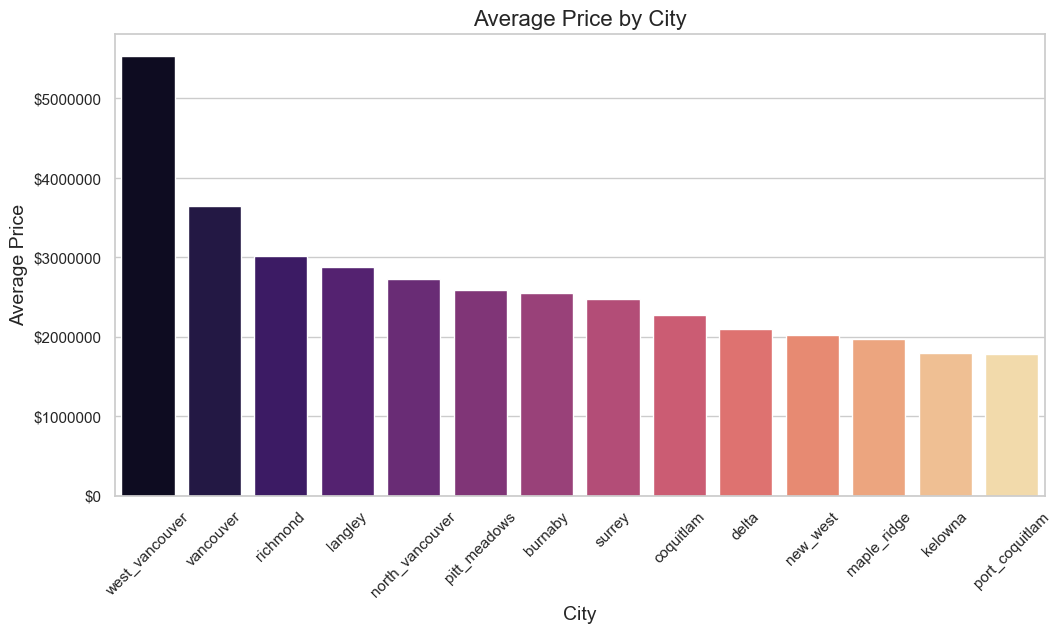

In [177]:

from matplotlib.ticker import FuncFormatter


# Group the data by the 'city' column and calculate the mean of the 'price' column
average_price_by_city = clean_combined_data.groupby('city')['price'].mean()

# Sort the average prices in descending order
average_price_by_city_sorted = average_price_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average prices
average_price_by_city_df = pd.DataFrame(average_price_by_city_sorted).reset_index()

# Rename the columns for better readability
average_price_by_city_df.columns = ['City', 'Average Price']

# Display the sorted average prices as a table
display(average_price_by_city_df.style.hide_index().format({"Average Price": "{:,.0f}"}))


# Function to format the y-axis values
def currency_fmt(x, pos):
    return f"${x:.0f}"


# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average price for each city using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Price', data=average_price_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Price by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

# Format the y-axis values as currency
formatter = FuncFormatter(currency_fmt)
ax.yaxis.set_major_formatter(formatter)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Average Number of Bedrooms for each City

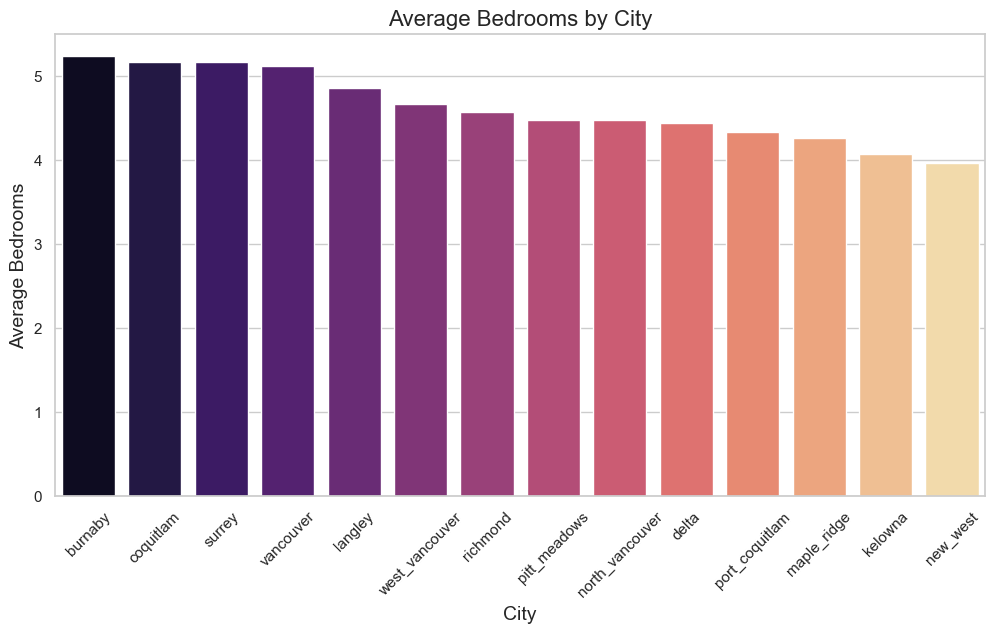

In [178]:
# Group the data by the 'city' column and calculate the mean of the 'bedrooms' column
average_bedrooms_by_city = clean_combined_data.groupby('city')['bedrooms'].mean()

# Sort the average bedrooms in descending order
average_bedrooms_by_city_sorted = average_bedrooms_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average bedrooms
average_bedrooms_by_city_df = pd.DataFrame(average_bedrooms_by_city_sorted).reset_index()

# Rename the columns for better readability
average_bedrooms_by_city_df.columns = ['City', 'Average Bedrooms']

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average bedrooms for each city using Seaborn with reversed colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Bedrooms', data=average_bedrooms_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Bedrooms by City', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Bedrooms', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

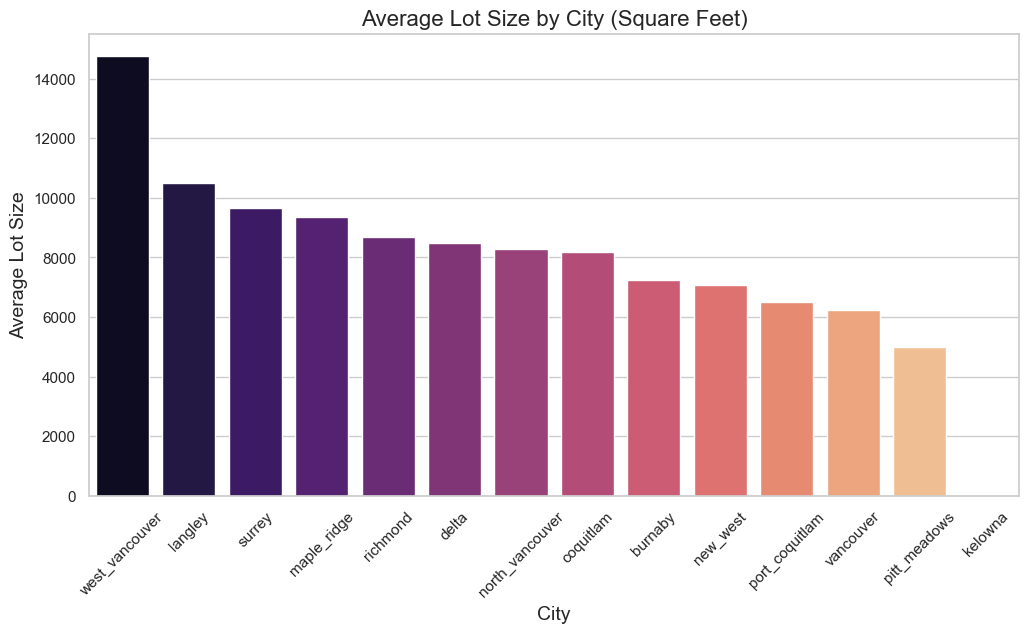

In [179]:
# Group the data by the 'city' column and calculate the mean of the 'lot_size' column
average_lot_size_by_city = clean_combined_data.groupby('city')['lot_size'].mean()

# Sort the average lot sizes in descending order
average_lot_size_by_city_sorted = average_lot_size_by_city.sort_values(ascending=False)

# Create a DataFrame from the sorted average lot sizes
average_lot_size_by_city_df = pd.DataFrame(average_lot_size_by_city_sorted).reset_index()

# Rename the columns for better readability
average_lot_size_by_city_df.columns = ['City', 'Average Lot Size']

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the sorted average lot sizes for each city using Seaborn with reversed colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='City', y='Average Lot Size', data=average_lot_size_by_city_df, palette="magma")

# Set the title and labels for the plot
ax.set_title('Average Lot Size by City (Square Feet)', fontsize=16)
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Average Lot Size', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

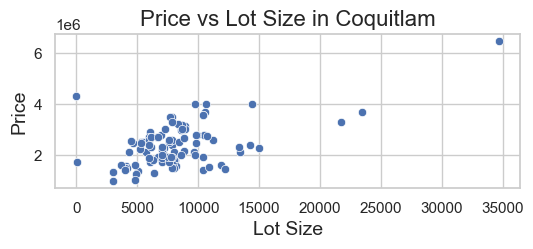

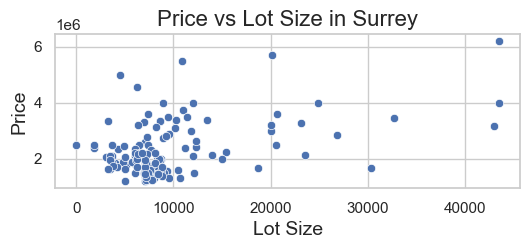

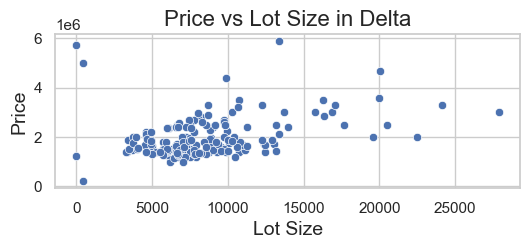

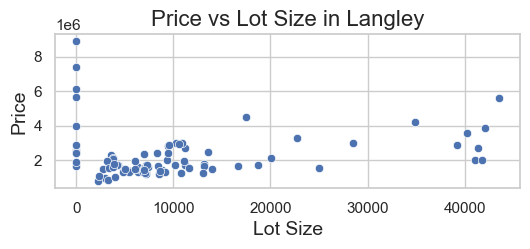

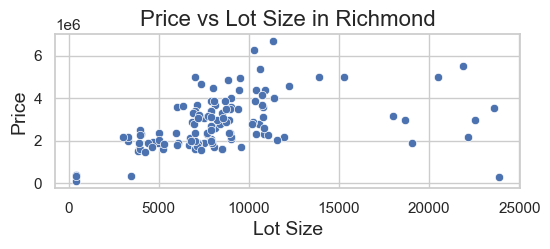

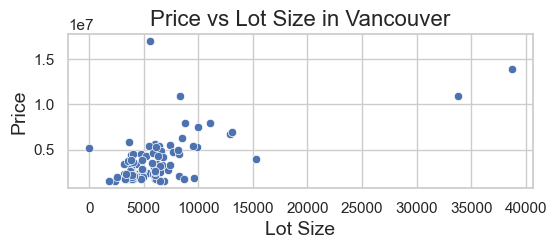

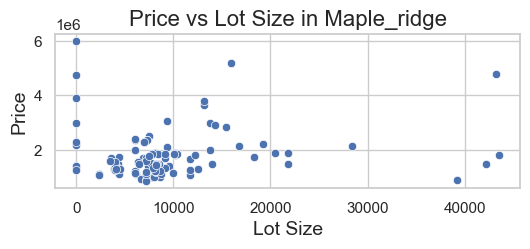

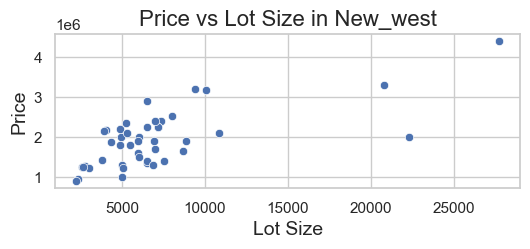

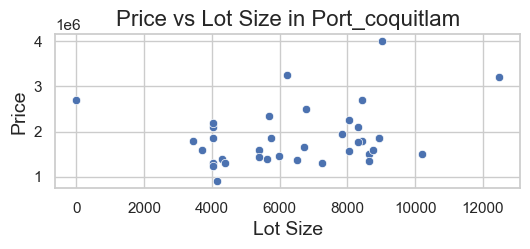

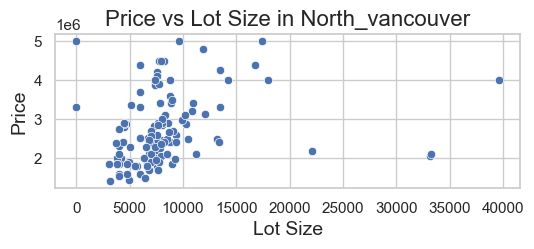

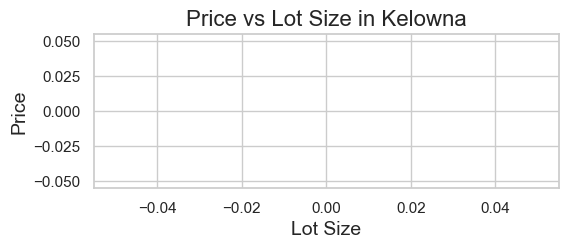

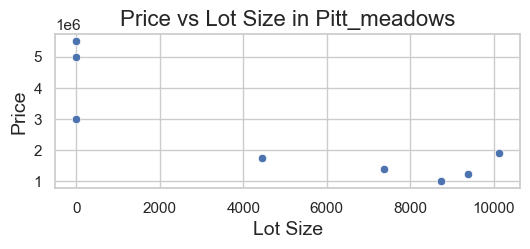

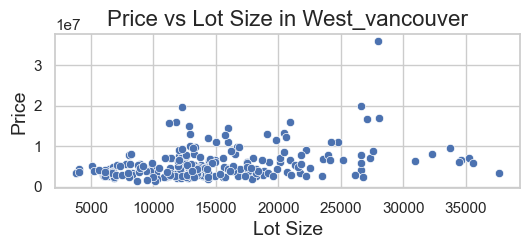

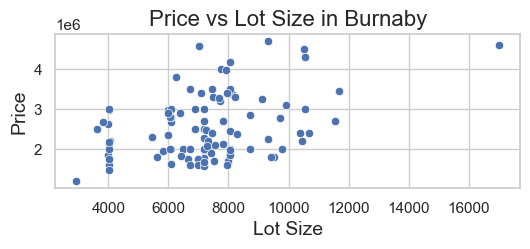

In [180]:

# Get the unique city names
unique_cities = clean_combined_data['city'].unique()

# Set the Seaborn style
sns.set(style="whitegrid")

# Loop through the unique cities and create a scatter plot for each city
for city in unique_cities:
    # Filter the data for the rows where the 'city' column equals the current city
    city_data = clean_combined_data[clean_combined_data['city'] == city]

    # Create a scatter plot for price vs lot size using Seaborn with the filtered data
    plt.figure(figsize=(6, 2))
    ax = sns.scatterplot(x='lot_size', y='price', data=city_data)

    # Set the title and labels for the plot
    ax.set_title(f'Price vs Lot Size in {city.capitalize()}', fontsize=16)
    ax.set_xlabel('Lot Size', fontsize=14)
    ax.set_ylabel('Price', fontsize=14)

    # Display the plot
    plt.show()

In [181]:
# Select the specified columns
selected_columns = ['address', 'price', 'gross_tax', 'bedrooms',
                    'bathrooms', 'property_type', 
                    'community', 'lot_size', 'half_bathrooms', 'lot_width', 'lot_length',
                    'age', 'bungalow', 'storey', 'basement', 'laneway_house', 'garage',
                    'split_entry', 'city']

df = clean_combined_data[selected_columns]



In [182]:
df.describe()

,price,gross_tax,bedrooms,bathrooms,lot_size,half_bathrooms,lot_width,lot_length,age,bungalow,storey,basement,laneway_house,garage,split_entry
count,2.190000e+03,2190.000000,2190.000000,2188.000000,1398.000000,2152.000000,1481.000000,1481.000000,2131.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,2.926310e+06,7205.701826,4.688584,3.215722,9447.022890,0.685409,131.682647,131.682647,38.237916,0.075342,1.460274,0.300457,-0.042922,-0.212329,-0.016895
std,2.332737e+06,7384.913882,1.690758,1.705605,6534.227638,0.684565,1641.237829,1641.237829,27.491018,0.403598,1.301165,0.550883,0.220018,0.761771,0.275690
min,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.649000e+06,4443.250000,4.000000,2.000000,6027.250000,0.000000,49.000000,49.000000,12.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
50%,2.250000e+06,5585.000000,5.000000,3.000000,7765.000000,1.000000,64.000000,64.000000,38.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,3.299975e+06,7577.250000,6.000000,4.000000,10817.750000,1.000000,82.000000,82.000000,57.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,3.588800e+07,83097.000000,14.000000,11.000000,43560.000000,6.000000,62631.000000,62631.000000,132.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [183]:
# Drop rows where the 'gross_tax' column is equal to 0
df = df[df['gross_tax'] != 0]
df = df[df['lot_size'] != 0]




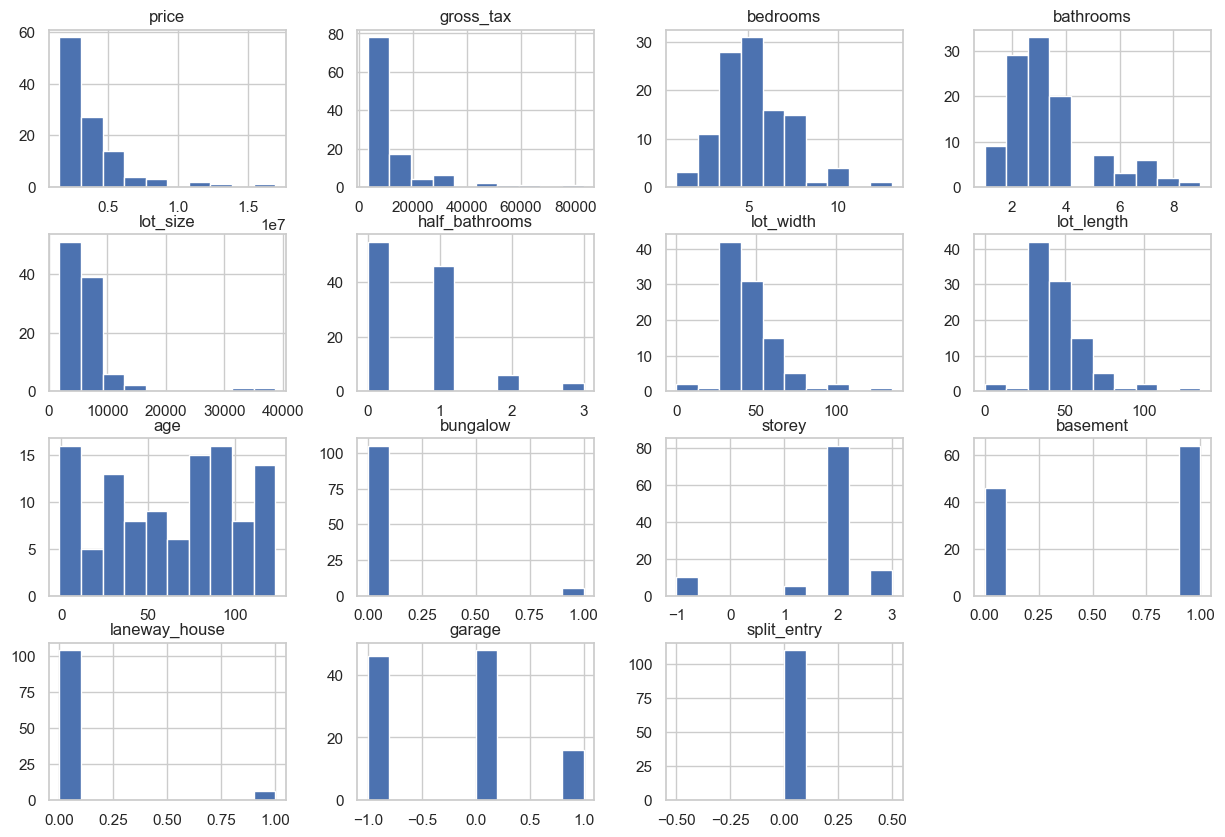

In [184]:

# Get the unique city names
unique_cities = df['city'].unique()
unique_cities = ['vancouver']

# Set the Seaborn style
sns.set(style="whitegrid")

# Loop through the unique cities and create a histogram for each city
for city in unique_cities:
    # Filter the data for the rows where the 'city' column equals the current city
    city_data = df[df['city'] == city]
    city_data.hist(figsize=(15,10))
    # Create a histogram for the price column in the filtered data
    # plt.figure(figsize=(12, 6))
    # ax = sns.histplot(data=city_data, x='price', bins=50)

    # # Set the title and labels for the plot
    # ax.set_title(f'Price Distribution in {city.capitalize()}', fontsize=16)
    # ax.set_xlabel('Price', fontsize=14)
    # ax.set_ylabel('Frequency', fontsize=14)

    # Display the plot
    plt.show()

<AxesSubplot:>

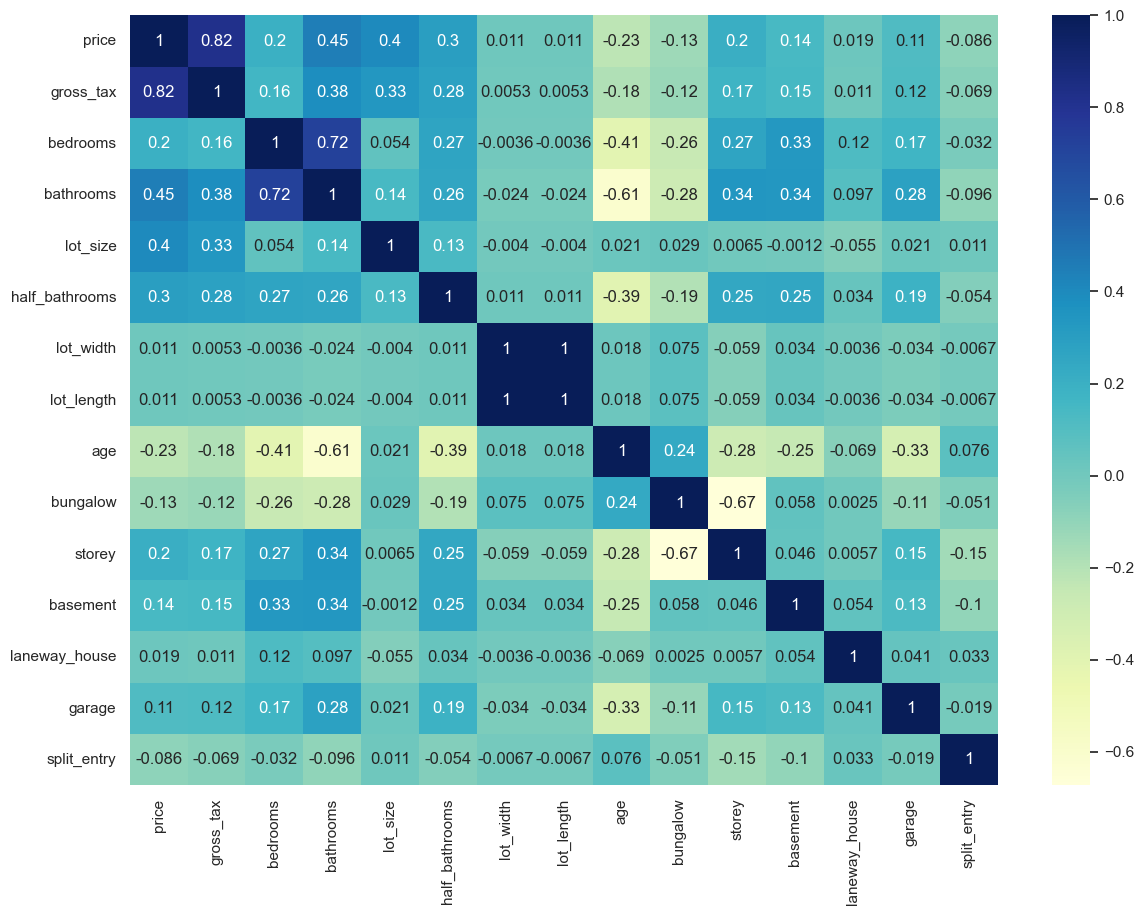

In [185]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [186]:

# Identify the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical columns
df = df.drop_duplicates()

df = pd.get_dummies(df, columns=categorical_columns)
df

,price,gross_tax,bedrooms,bathrooms,lot_size,half_bathrooms,lot_width,lot_length,age,bungalow,...,city_langley,city_maple_ridge,city_new_west,city_north_vancouver,city_pitt_meadows,city_port_coquitlam,city_richmond,city_surrey,city_vancouver,city_west_vancouver
0,3488000,4504,7.0,7.0,7875.0,2.0,63.0,63.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1100000,3316,3.0,3.0,NaN,0.0,NaN,NaN,43.0,0,...,0,0,0,0,0,0,0,0,0,0
2,1450000,3867,4.0,2.0,NaN,0.0,NaN,NaN,41.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1379000,3789,4.0,2.0,NaN,1.0,NaN,NaN,42.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2099900,5129,6.0,2.0,9648.0,0.0,72.0,72.0,64.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2258000,6531,5.0,3.0,9325.0,1.0,69.0,69.0,46.0,0,...,0,0,0,0,0,0,0,0,0,0
2186,2999800,7579,5.0,4.0,6100.0,1.0,50.0,50.0,2.0,0,...,0,0,0,0,0,0,0,0,0,0
2187,3280000,9413,9.0,6.0,7695.0,1.0,57.0,57.0,11.0,0,...,0,0,0,0,0,0,0,0,0,0
2188,2898000,4560,7.0,4.0,6000.0,2.0,50.0,50.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

df['price'] = df['price'].apply(lambda x: math.ceil(x / 600000) * 600000)

df = df.dropna()
scaler = StandardScaler()

X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)





In [188]:
reg = LinearRegression()

reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8824190199717379

In [189]:
from sklearn.ensemble import RandomForestClassifier
forest_s = RandomForestClassifier()
forest_s.fit(X_train_s, y_train)
forest_s.score(X_test_s, y_test)

0.4122137404580153

In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import math
import tensorflow as tf


data = df

# Define the target variable (price) and feature columns
target = 'price'
features = data.drop(columns=[target]).columns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=700, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error: {loss}')

# Make predictions
predictions = model.predict(X_test_scaled)

Epoch 1/700
33/33 [==============================] - 1s 1ms/step - loss: 15745869152256.0000 - accuracy: 0.0000e+00
Epoch 2/700
33/33 [==============================] - 0s 1ms/step - loss: 10025806331904.0000 - accuracy: 0.0000e+00
Epoch 3/700
33/33 [==============================] - 0s 1ms/step - loss: 3599827730432.0000 - accuracy: 0.0000e+00
Epoch 4/700
33/33 [==============================] - 0s 2ms/step - loss: 2513985077248.0000 - accuracy: 0.0000e+00
Epoch 5/700
33/33 [==============================] - 0s 2ms/step - loss: 1956834705408.0000 - accuracy: 0.0000e+00
Epoch 6/700
33/33 [==============================] - 0s 2ms/step - loss: 1578038722560.0000 - accuracy: 0.0000e+00
Epoch 7/700
33/33 [==============================] - 0s 2ms/step - loss: 1470527963136.0000 - accuracy: 0.0000e+00
Epoch 8/700
33/33 [==============================] - 0s 2ms/step - loss: 1110957621248.0000 - accuracy: 0.0000e+00
Epoch 9/700
33/33 [==============================] - 0s 2ms/step - loss: 77092

In [203]:
from sklearn.metrics import mean_squared_error

# Round the predictions to the nearest multiple of 600000
predictions_rounded = np.vectorize(lambda x: math.ceil(x / 600000) * 600000)(predictions)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions_rounded)

print(f"Mean Squared Error: {mse}")

rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

predictions_rounded[:5]

Mean Squared Error: 1030534351145.0382
RMSE: 1015152.3782886184


array([[5400000],
       [8400000],
       [3000000],
       [3000000],
       [5400000]])

In [192]:
y_test[:5]

1970    5400000
1825    7200000
1739    3000000
1455    2400000
2038    6000000
Name: price, dtype: int64

In [193]:
epoch 100 gives RMSE: 1441849
epoch 500 gives RMSE: 1399290
epoch 500 with bunch 4 layers : RMSE: 1218182
epoch 700 with bunch 7 layers : RMSE: 1073056
epoch 700 with bunch 15 layers : RMSE: 1021225.1286365698
epoch 700 with bunch 15 layers : RMSE: 1015152.3782886184
epoch 700 with sigmoid layer           2413416.6968577467


SyntaxError: invalid syntax (4238555750.py, line 1)